In [1]:
with open('spacex.txt',encoding = 'utf-8') as f:
    text = f.read()
    

In [2]:
from textblob import TextBlob

blob = TextBlob(text)
#blob.word_counts

In [3]:
#removing stopwords 
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


word_list = [(word, count) for word, count in blob.word_counts.items() if word not in stop_words]


In [4]:
# remove the numberes and non alphabetic terms from blob.words keeping the count 

words =[(word,count) for word,count in word_list if word.isalpha()]
type(words)

list

In [5]:
# sort the list and make a bar chart of 20 top words using pandas
words_sorted = sorted(words,key = lambda x:x[1])

# OR
#from operator import itemgetter
#words.sort(key = itemgetter(1),Reverse= true)



In [6]:
import pandas as pd 
df = pd.DataFrame(words_sorted)
df.columns =['word','count']


Text(0.5, 1.0, 'Word Count')

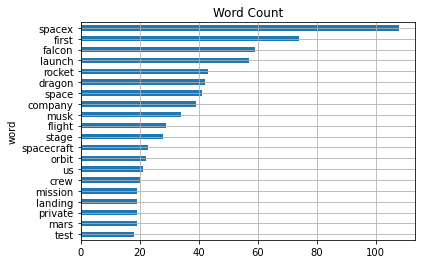

In [7]:
axis = df.tail(20).plot(kind = 'barh',x ='word',y ='count',legend = False,grid = True)
axis.set_title('Word Count')


In [8]:
happy = TextBlob('Adolf Hitler.Is a happy man.And he didnt mean it. ')
happy.sentiment

Sentiment(polarity=0.24375000000000002, subjectivity=0.84375)

In [9]:
for sentence in happy.sentences:
    print(happy.sentiment)

Sentiment(polarity=0.24375000000000002, subjectivity=0.84375)


In [10]:
# blob spelcheck 
misspelled = TextBlob('If I cculd turnn bak time.')

for word in misspelled.words:
    print(word.spellcheck())

[('Of', 0.9362354096980188), ('If', 0.05550747350939159), ('Ff', 0.00444434048326355), ('F', 0.0035554723866108393), ('Cf', 0.0002573039227152581)]
[('I', 1.0)]
[('could', 1.0)]
[('turn', 0.8785046728971962), ('turns', 0.12149532710280374)]
[('back', 0.652668416447944), ('bad', 0.13560804899387577), ('bank', 0.09536307961504811), ('oak', 0.026246719160104987), ('bar', 0.021872265966754154), ('bay', 0.020122484689413824), ('bag', 0.01837270341207349), ('bark', 0.007874015748031496), ('ban', 0.005249343832020997), ('balk', 0.0026246719160104987), ('ak', 0.0026246719160104987), ('beak', 0.0017497812773403325), ('bat', 0.0017497812773403325), ('bal', 0.0017497812773403325), ('bake', 0.0017497812773403325), ('bah', 0.0017497812773403325), ('ba', 0.0017497812773403325), ('bask', 0.0008748906386701663)]
[('time', 1.0)]


In [11]:
print(misspelled)
print(misspelled.correct())

If I cculd turnn bak time.
Of I could turn back time.


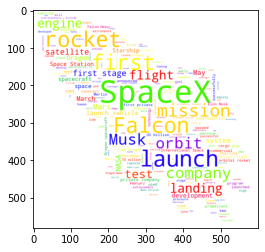

In [12]:
from pathlib import Path
import matplotlib.pyplot as plt
import imageio

mask_image = imageio.imread('rocket.png')


text = Path('spacex.txt').read_text()

from wordcloud import WordCloud

wordcloud = WordCloud(width = 1000,height =1000,
                     colormap = 'prism',mask = mask_image,background_color ='white')

wordcloud = wordcloud.generate(text)

wordcloud = wordcloud.to_file('spacex.png')
plt.imshow(wordcloud)